In [1]:
import cirq
import qsimcirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
import sys
sys.path.append(r'C:\cloud\QEC\densityMatrix\google')
import NoiseChannel as NC
import QutritGate as QG
from qcisToCirq import qcisToCirq
from ZXXZ10 import EC,ECDD
from config import *
import multiprocessing
from functools import partial
import numpy as np
from qubitPara import *

In [ ]:
class QutritPlusGate(cirq.Gate):
    def __init__(self):
        super(QutritPlusGate, self)

    def _num_qubits_(self):
            return 2

    def _qid_shape_(self):
        return (3,3)

    def _unitary_(self):
        return np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
                         [1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0]]/ np.sqrt(2))

    def _circuit_diagram_info_(self, args):
        return '[X]','[X]'

q0, q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, q14, q15, q16 = cirq.LineQid.range(17, dimension=3)
circuit = cirq.Circuit([
    QutritPlusGate().on(q0,q1), 
    cirq.measure(q0, q1, key="m0"),
    # QutritPlusGate()(q1),
    # QutritPlusGate()(q1),
    cirq.measure(q0, q1, key="m1")
])

result = cirq.sample(circuit, repetitions=3)

SVGCircuit(circuit)
# print(result)

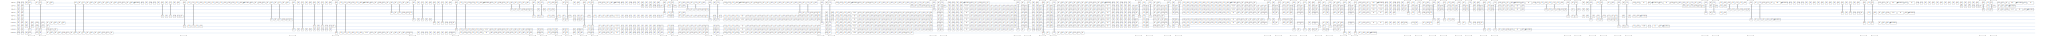

In [5]:
nD = 3
M_Dire = MZ
fHL = fWest
qData = Q_Data

pDict = {'px':px,'py':py,'pz':pz,'pM':pM,'pReset01':pReset01,'pReset02':pReset02,'pLeak':1,'pCZ':pCZ,'pCT':pCT}
tDict = {'T1_10':T1_10,'T1_21':T1_21,'Tp_10':Tp_10,'Tp_21':Tp_21,'Th12':Th12,'tH':700000,'tCZ':tCZ}

qcis = f'{init_random}'+1*f'{ECDD(nD,tH,tCZ,tM,tR)}'+f'{EC(tH,tCZ)}{M_Dire}{M_Data}'
circuitList = qcisToCirq(qcis,qData,pDict,tDict,fHL,ten=True,eleven=False,circ=[]).matchline()
circuit = cirq.Circuit(circuitList)
SVGCircuit(circuit)